<a href="https://colab.research.google.com/github/christine127/Portfolio_Recommendation_Project/blob/main/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EC%8B%9C%EB%8F%84_MBTI%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,359 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
path= '/content/drive/MyDrive/소회의실 프로젝트/전처리_완료/'

In [4]:
customer_info = pd.read_csv(path+'customer_info_brif_코스피코스닥합체.csv')
customer_info.set_index('고객구분코드',inplace= True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customer_info

In [5]:
# # select_cols = ['상하한가여부','매도매수일치_외국인','매도매수일치_기관']
# select_cols = ['수익률']
# # customer_info_sc = customer_info_cut.copy()
# customer_info_sc = customer_info[select_cols].copy()

In [6]:
# customer_info_sc.hist(bins=range(-30, 30, 1), figsize=(10,5))

# plt.rc('font', family='NanumBarunGothic')
# plt.show()

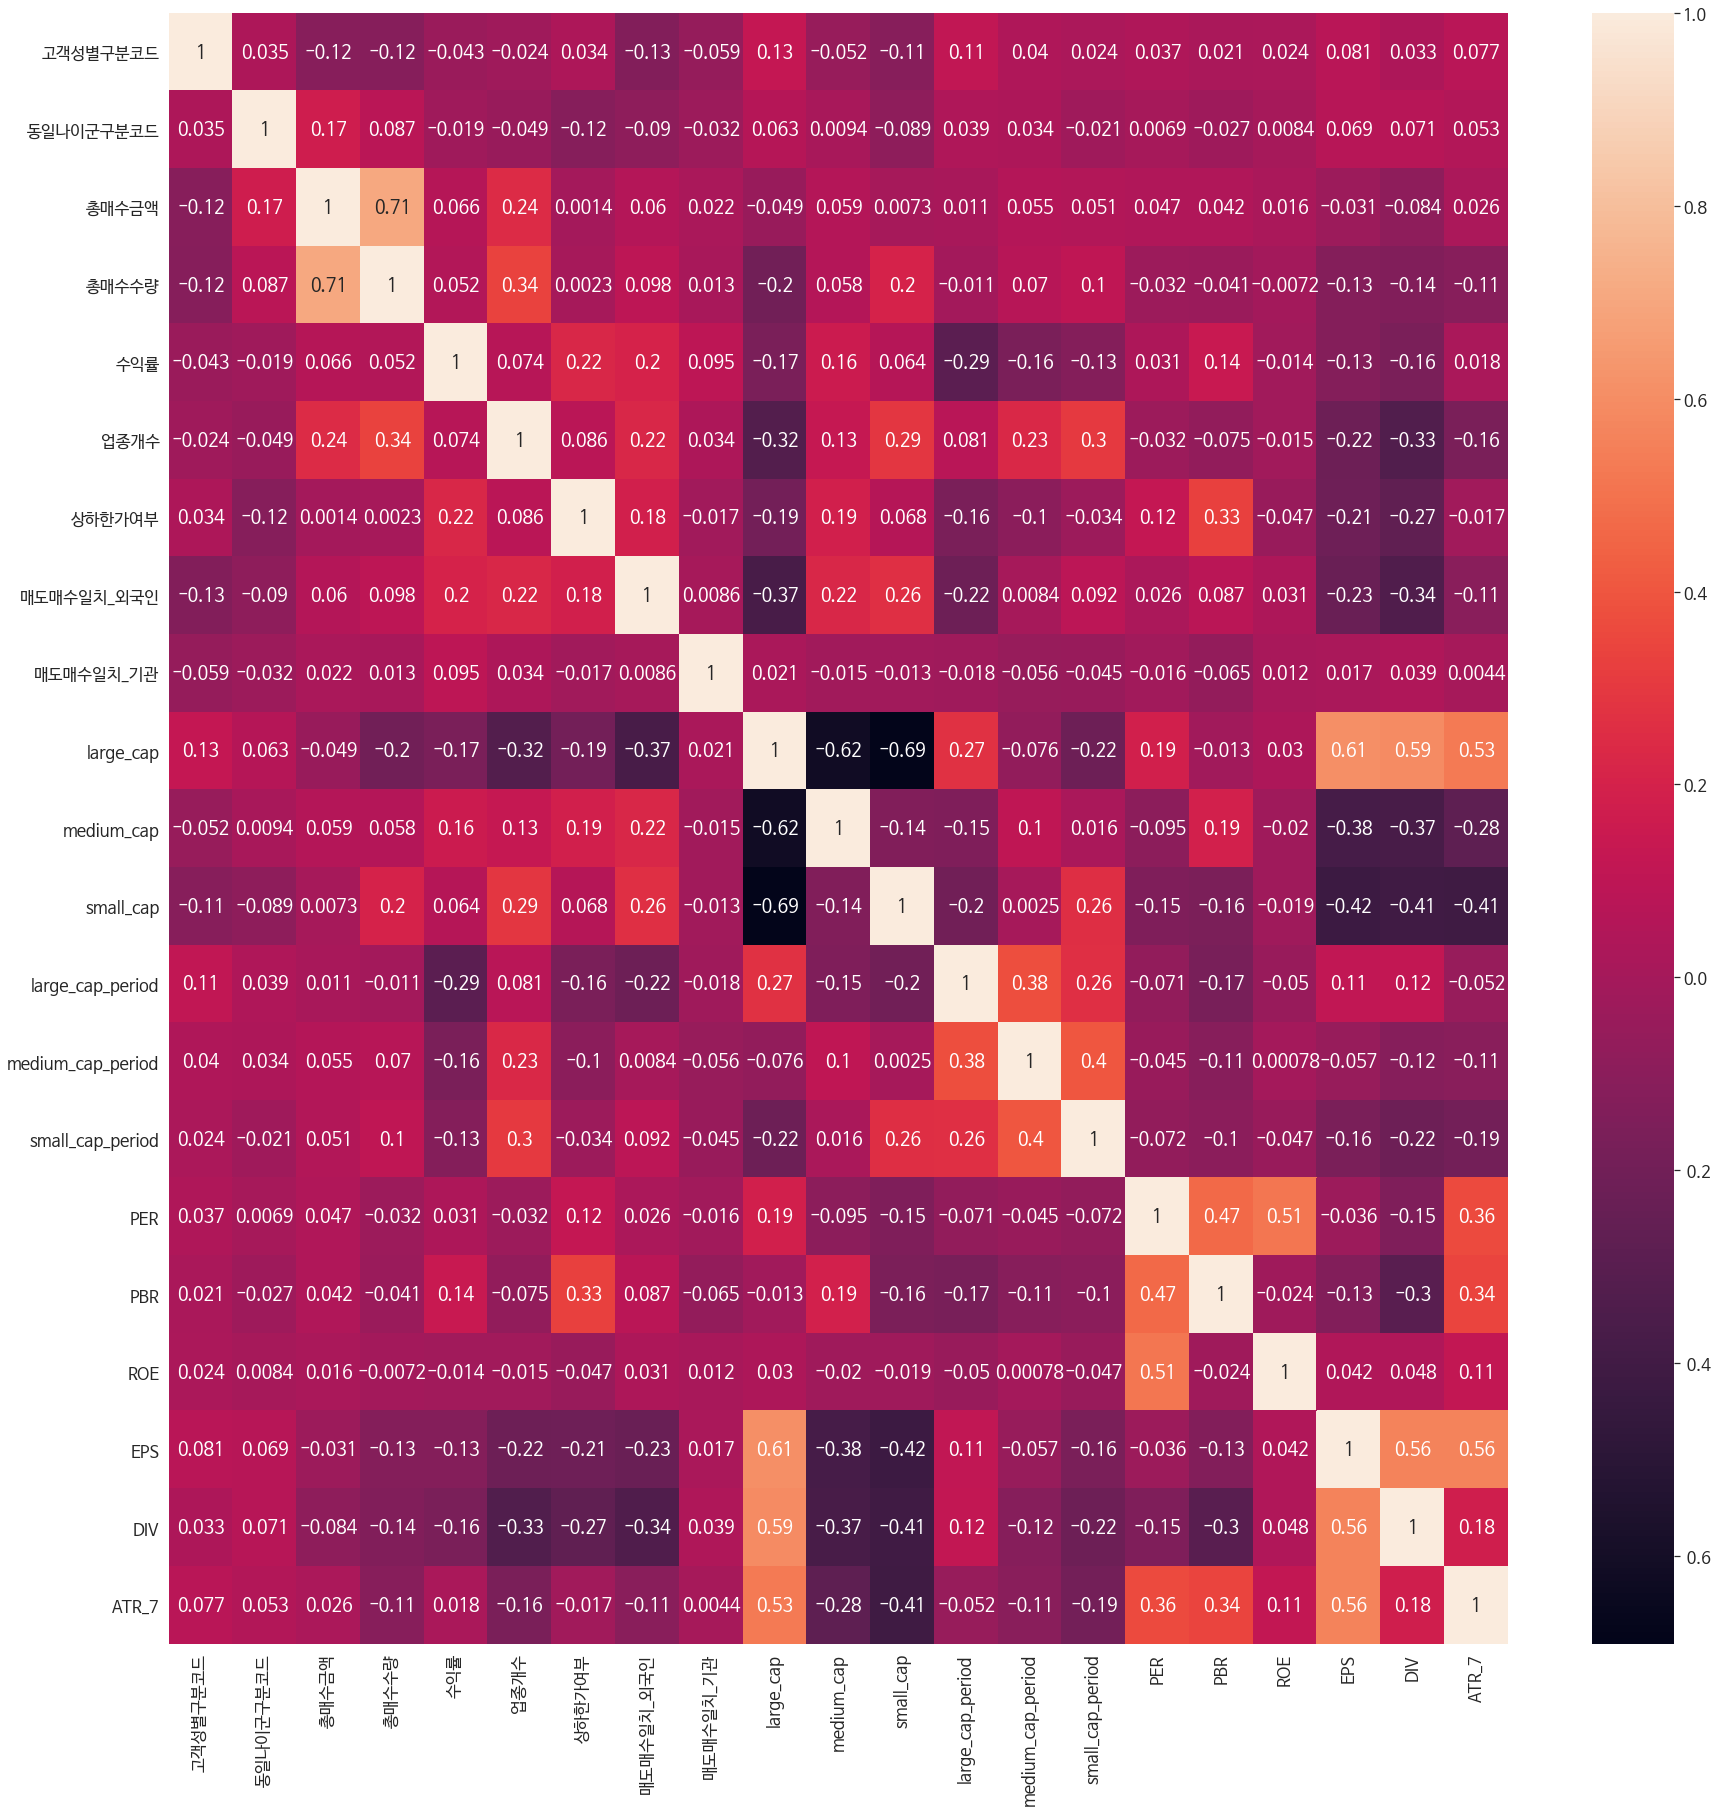

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')
import seaborn as sns
sns.set(font_scale=1.5) 
plt.figure(figsize=(30,30))
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(customer_info.corr(), annot= True, fmt ='0.2g')
# plt.show()

In [7]:
def visualize_silhouette(cluster_lists, X_features): 
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [8]:
sc = MinMaxScaler()
cols = customer_info.columns.drop('주소')
customer_info_scaled = customer_info.drop('주소',axis=1)
customer_info_scaled[cols] = sc.fit_transform(customer_info_scaled[cols])

# 클러스터1

In [9]:

cluster1_col = ['large_cap', 'EPS', 'DIV', 'ATR_7','PER']

temp1 = customer_info_scaled[cluster1_col]

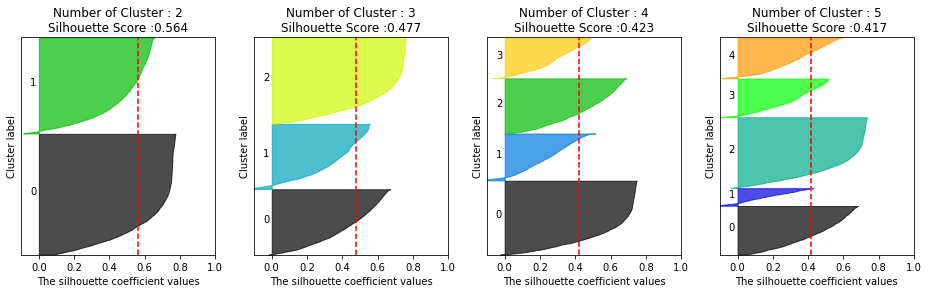

In [10]:
visualize_silhouette([2, 3, 4, 5], temp1)

In [11]:
kmeans = KMeans(n_clusters = 2, random_state=0)
kc = kmeans.fit_predict(temp1)
customer_info_kmeans = temp1.copy()

customer_info['Cluster1'] = kc
customer_info

,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1
고객구분코드,,,,,,,,,,,,,,,,,,,,,,,
A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,1
A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,1
A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,0
A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,0
A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,1
A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,0
A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,1


In [12]:
customer_info['Cluster1'].replace(0, 'A', inplace=True)
customer_info['Cluster1'].replace(1, 'B', inplace=True)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


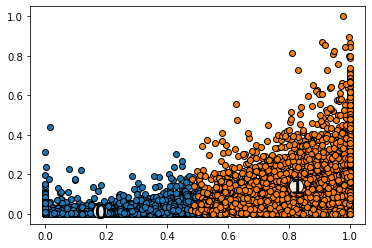

In [18]:
customer_info_kmeans['Cluster1'] = kc
customer_info_kmeans

centers = kmeans.cluster_centers_
unique_labels = np.unique(kc)
markers= ['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = customer_info_kmeans.loc[customer_info_kmeans['Cluster1'] ==label]
  center_x_y= centers[label]
  plt.scatter(x= label_cluster['large_cap'],y= label_cluster['EPS'], edgecolor = 'k')
              #  marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'white',
               alpha= 0.9, edgecolor='k') #marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'k',
               edgecolor = 'k', marker = '$%d$' %label)
plt.show()

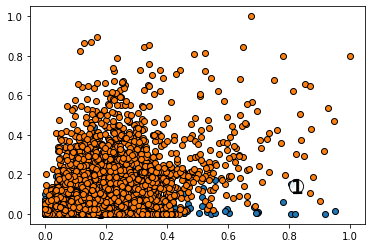

In [20]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(kc)
markers= ['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = customer_info_kmeans.loc[customer_info_kmeans['Cluster1'] ==label]
  center_x_y= centers[label]
  plt.scatter(x= label_cluster['DIV'],y= label_cluster['EPS'], edgecolor = 'k')
              #  marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'white',
               alpha= 0.9, edgecolor='k') #marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'k',
               edgecolor = 'k', marker = '$%d$' %label)
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters = 2, random_state=0)
# kc = kmeans.fit_predict(temp4)
# customer_info_kmeans = temp4.copy()
# customer_info_kmeans['Cluster4'] = kc
# customer_info_kmeans

,large_cap_period,medium_cap_period,small_cap_period,Cluster
고객구분코드,,,,
A000973,5.500000,0.000000,0.000000,0
A00013780,5.600000,11.500000,0.000000,0
A0009975,0.000000,25.933333,0.000000,0
A00012551,0.000000,7.600000,10.333333,0
A000706,0.000000,0.000000,8.714286,0
...,...,...,...,...
A00011326,19.000000,12.000000,15.877544,0
A000162,18.000000,17.400000,1.333333,0
A0004156,17.282739,1.000000,0.000000,0


In [ ]:
# customer_info_kmeans.Cluster.value_counts()

0    5279
1    2659
Name: Cluster, dtype: int64

In [ ]:
# centers = kmeans.cluster_centers_
# unique_labels = np.unique(kc)
# markers= ['o','s','^','P','D','H','x']

# for label in unique_labels:
#   label_cluster = customer_info_kmeans.loc[customer_info_kmeans['Cluster'] ==label]
#   center_x_y= centers[label]
#   plt.scatter(x= label_cluster['medium_cap_period'],y= label_cluster['small_cap_period'], edgecolor = 'k')
#               #  marker = markers[label])
#   plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'white',
#                alpha= 0.9, edgecolor='k') #marker = markers[label])
#   plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'k',
#                edgecolor = 'k', marker = '$%d$' %label)
# plt.show()

# 클러스터5

In [33]:
cluster5_col = ['업종개수', 'medium_cap_period', 'small_cap_period']
temp5 = customer_info[cluster5_col]

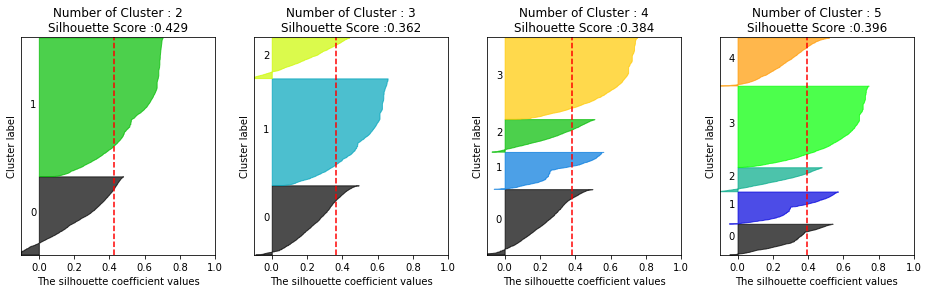

In [34]:
visualize_silhouette([2, 3, 4, 5], temp5)

In [15]:
kmeans = KMeans(n_clusters = 2, random_state=0)
kc = kmeans.fit_predict(temp5)
customer_info_kmeans = temp5.copy()

customer_info['Cluster5'] = kc
customer_info

,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1,Cluster5
고객구분코드,,,,,,,,,,,,,,,,,,,,,,,,
A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,B,1
A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,B,1
A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,A,1
A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,A,1
A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,B,1
A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,A,1
A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,B,1


In [16]:
customer_info['Cluster5'].replace(0, 'A', inplace=True)
customer_info['Cluster5'].replace(1, 'B', inplace=True)

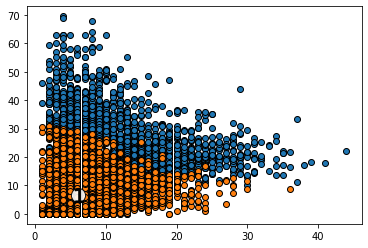

In [25]:
customer_info_kmeans['Cluster5'] = kc
customer_info_kmeans

centers = kmeans.cluster_centers_
unique_labels = np.unique(kc)
markers= ['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = customer_info_kmeans.loc[customer_info_kmeans['Cluster5'] ==label]
  center_x_y= centers[label]
  plt.scatter(x= label_cluster['업종개수'],y= label_cluster['small_cap_period'], edgecolor = 'k')
              #  marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'white',
               alpha= 0.9, edgecolor='k') #marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'k',
               edgecolor = 'k', marker = '$%d$' %label)
plt.show()

In [17]:
cluster6_col = ['매도매수일치_외국인', 'medium_cap', 'small_cap','large_cap_period']
temp6 = customer_info[cluster6_col]

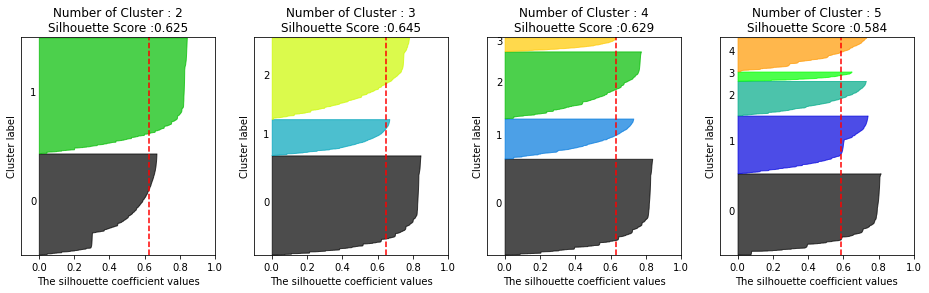

In [59]:
visualize_silhouette([2, 3, 4, 5], temp6)

In [18]:
kmeans = KMeans(n_clusters = 2, random_state=0)
kc = kmeans.fit_predict(temp6)
customer_info_kmeans = temp6.copy()
# customer_info_kmeans['Cluster6'] = kc
# customer_info_kmeans
customer_info['Cluster6'] = kc
customer_info

,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1,Cluster5,Cluster6
고객구분코드,,,,,,,,,,,,,,,,,,,,,,,,,
A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,B,B,1
A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,B,B,1
A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,A,B,1
A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,A,B,1
A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,A,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,B,B,0
A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,A,B,0
A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,B,B,0


In [19]:
customer_info['Cluster6'].replace(0, 'A', inplace=True)
customer_info['Cluster6'].replace(1, 'B', inplace=True)

In [36]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(kc)
markers= ['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = customer_info_kmeans.loc[customer_info_kmeans['Cluster'] ==label]
  center_x_y= centers[label]
  plt.scatter(x= label_cluster['매도매수일치_외국인'],y= label_cluster['small_cap'], edgecolor = 'k')
              #  marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'white',
               alpha= 0.9, edgecolor='k') #marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'k',
               edgecolor = 'k', marker = '$%d$' %label)
plt.show()

AttributeError: ignored

In [ ]:
customer_info.columns

Index(['고객성별구분코드', '동일나이군구분코드', '주소', '총매수금액', '총매수수량', '수익률', '업종개수',
       '상하한가여부', '매도매수일치_외국인', '매도매수일치_기관', 'large_cap', 'medium_cap',
       'small_cap', 'large_cap_period', 'medium_cap_period',
       'small_cap_period', 'PER', 'PBR', 'ROE', 'EPS', 'DIV', 'ATR_7'],
      dtype='object')

In [20]:
cluster7_col = ['수익률', 'PBR', '상하한가여부']
temp7 = customer_info[cluster7_col]

KeyboardInterrupt: ignored

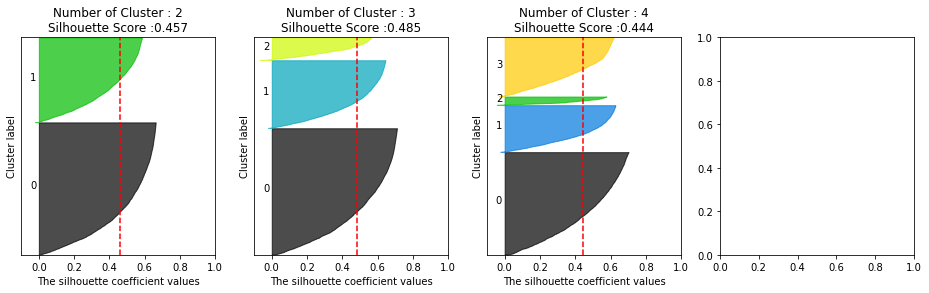

In [21]:
visualize_silhouette([2, 3, 4, 5], temp7)

In [22]:
kmeans = KMeans(n_clusters = 2, random_state=0)
kc = kmeans.fit_predict(temp7)
customer_info_kmeans = temp7.copy()
# customer_info_kmeans['Cluster7'] = kc
# customer_info_kmeans
customer_info['Cluster7'] = kc
customer_info

,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1,Cluster5,Cluster6,Cluster7
고객구분코드,,,,,,,,,,,,,,,,,,,,,,,,,,
A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,B,B,B,0
A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,B,B,B,0
A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,A,B,B,0
A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,A,B,B,1
A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,A,B,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,B,B,A,1
A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,A,B,A,1
A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,B,B,A,0


In [23]:
customer_info['Cluster7'].replace(0, 'A', inplace=True)
customer_info['Cluster7'].replace(1, 'B', inplace=True)

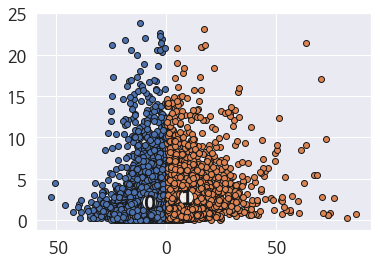

In [ ]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(kc)
markers= ['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster = customer_info_kmeans.loc[customer_info_kmeans['Cluster'] ==label]
  center_x_y= centers[label]
  plt.scatter(x= label_cluster['수익률'],y= label_cluster['PBR'], edgecolor = 'k')
              #  marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'white',
               alpha= 0.9, edgecolor='k') #marker = markers[label])
  plt.scatter(x = center_x_y[0], y= center_x_y[1], s= 200, color= 'k',
               edgecolor = 'k', marker = '$%d$' %label)
plt.show()

In [24]:
cluster= ['Cluster1', 'Cluster5', 'Cluster6', 'Cluster7']
customer_info['MBTI'] = ''
for cls in cluster:
  customer_info['MBTI'] = customer_info['MBTI']+customer_info[cls].astype(str)

In [25]:
customer_info['MBTI'].value_counts()

ABBB    1080
BBAA     929
ABBA     834
BBBA     724
AAAA     724
BAAA     694
BBBB     624
AABA     493
ABAB     347
AAAB     341
ABAA     332
AABB     274
BBAB     203
BAAB     134
BABA     113
BABB      92
Name: MBTI, dtype: int64

In [30]:
for c in cluster:
  print(customer_info[c].value_counts())

A    4425
B    3513
Name: Cluster1, dtype: int64
B    5073
A    2865
Name: Cluster5, dtype: int64
B    4234
A    3704
Name: Cluster6, dtype: int64
A    4843
B    3095
Name: Cluster7, dtype: int64


In [35]:
customer_info.reset_index(inplace=True)


In [36]:
customer_info['MBTI'] = customer_info['MBTI'].astype(str)

In [37]:
customer_info

,고객구분코드,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1,Cluster5,Cluster6,Cluster7,MBTI
0,A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,B,B,B,A,BBBA
1,A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,B,B,B,A,BBBA
2,A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,A,B,B,A,ABBA
3,A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,A,B,B,B,ABBB
4,A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,A,B,B,B,ABBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,B,B,A,B,BBAB
7934,A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,A,B,A,B,ABAB
7935,A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,B,B,A,A,BBAA
7936,A00021187,1,30,충북,762900.0,14.0,3.591559,3,0.000000,0.166667,0.333333,0.869446,0.130554,0.000000,9.000000,15.428952,0.000000,5.322563,0.815759,7.209069,7304.905323,3.146507,3753.527213,B,B,B,B,BBBB


In [38]:
customer_info.to_csv(path + '클러스터링_16가지2.csv')

In [39]:
customer_info = pd.read_csv(path +'클러스터링_16가지2.csv')

In [40]:
customer_info

,Unnamed: 0,고객구분코드,고객성별구분코드,동일나이군구분코드,주소,총매수금액,총매수수량,수익률,업종개수,상하한가여부,매도매수일치_외국인,매도매수일치_기관,large_cap,medium_cap,small_cap,large_cap_period,medium_cap_period,small_cap_period,PER,PBR,ROE,EPS,DIV,ATR_7,Cluster1,Cluster5,Cluster6,Cluster7,MBTI
0,0,A000973,2,30,경기,1691500.0,19.0,-2.483187,2,0.000000,0.250000,0.250000,1.000000,0.000000,0.000000,5.500000,0.000000,0.000000,7.588331,0.703141,14.978474,13138.000591,1.907657,6845.289473,B,B,B,A,BBBA
1,1,A00013780,2,30,서울,18044560.0,588.0,-2.593365,3,0.350000,0.350000,0.400000,0.805578,0.194422,0.000000,5.600000,11.500000,0.000000,118.408418,8.193013,12.176953,856.703595,0.101752,7372.020518,B,B,B,A,BBBA
2,2,A0009975,2,50,충북,195560.0,23.0,-14.143997,1,0.000000,0.100000,0.200000,0.000000,1.000000,0.000000,0.000000,25.933333,0.000000,1.396000,0.696500,2.005266,6032.000000,3.646500,515.642857,A,B,B,A,ABBA
3,3,A00012551,1,30,경기,20627310.0,4558.0,2.291601,15,0.035714,0.464286,0.464286,0.000000,0.437730,0.562270,0.000000,7.600000,10.333333,20.328912,0.800545,17.152872,283.279906,0.621850,460.803372,A,B,B,B,ABBB
4,4,A000706,1,20,경기,1128091.0,1797.0,2.535725,6,0.000000,0.454545,0.545455,0.324974,0.000000,0.675026,0.000000,0.000000,8.714286,2.883263,0.604482,2.487257,694.305208,0.246067,154.412290,A,B,B,B,ABBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,7933,A00011326,1,30,울산,7080700.0,5113.0,8.876954,5,0.090909,0.272727,0.454545,0.623907,0.160012,0.216080,19.000000,12.000000,15.877544,10.191896,0.411284,14.166497,1688.963348,1.230015,2394.646148,B,B,A,B,BBAB
7934,7934,A000162,1,20,전남,94244200.0,5233.0,2.416450,6,0.111111,0.481481,0.500000,0.147817,0.140894,0.711289,18.000000,17.400000,1.333333,9.507987,2.680652,3.914983,136.685624,0.188696,2418.547417,A,B,A,B,ABAB
7935,7935,A0004156,1,20,경기,528900.0,9.0,-7.139719,2,0.000000,0.333333,0.166667,0.924560,0.075440,0.000000,17.282739,1.000000,0.000000,13.993953,0.677143,16.671019,7119.931917,3.832914,6392.283000,B,B,A,A,BBAA
7936,7936,A00021187,1,30,충북,762900.0,14.0,3.591559,3,0.000000,0.166667,0.333333,0.869446,0.130554,0.000000,9.000000,15.428952,0.000000,5.322563,0.815759,7.209069,7304.905323,3.146507,3753.527213,B,B,B,B,BBBB


In [ ]:
#상관관계 높은 것 묶음
cluster1_col = ['large_cap', 'EPS', 'DIV', 'ATR_7']
cluster5_col = ['업종개수', 'medium_cap', 'medium_cap_period', 'small_cap_period']
cluster6_col = ['매도매수일치_외국인', 'medium_cap', 'small_cap']
cluster7_col = ['수익률', 'PBR', '상하한가여부']

cluster_col = cluster1_col + cluster5_col + cluster6_col + cluster7_col

In [ ]:
cluster_col

['large_cap',
 'EPS',
 'DIV',
 'ATR_7',
 '업종개수',
 'medium_cap',
 'medium_cap_period',
 'small_cap_period',
 '매도매수일치_외국인',
 'medium_cap',
 'small_cap',
 '수익률',
 'PBR',
 '상하한가여부']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

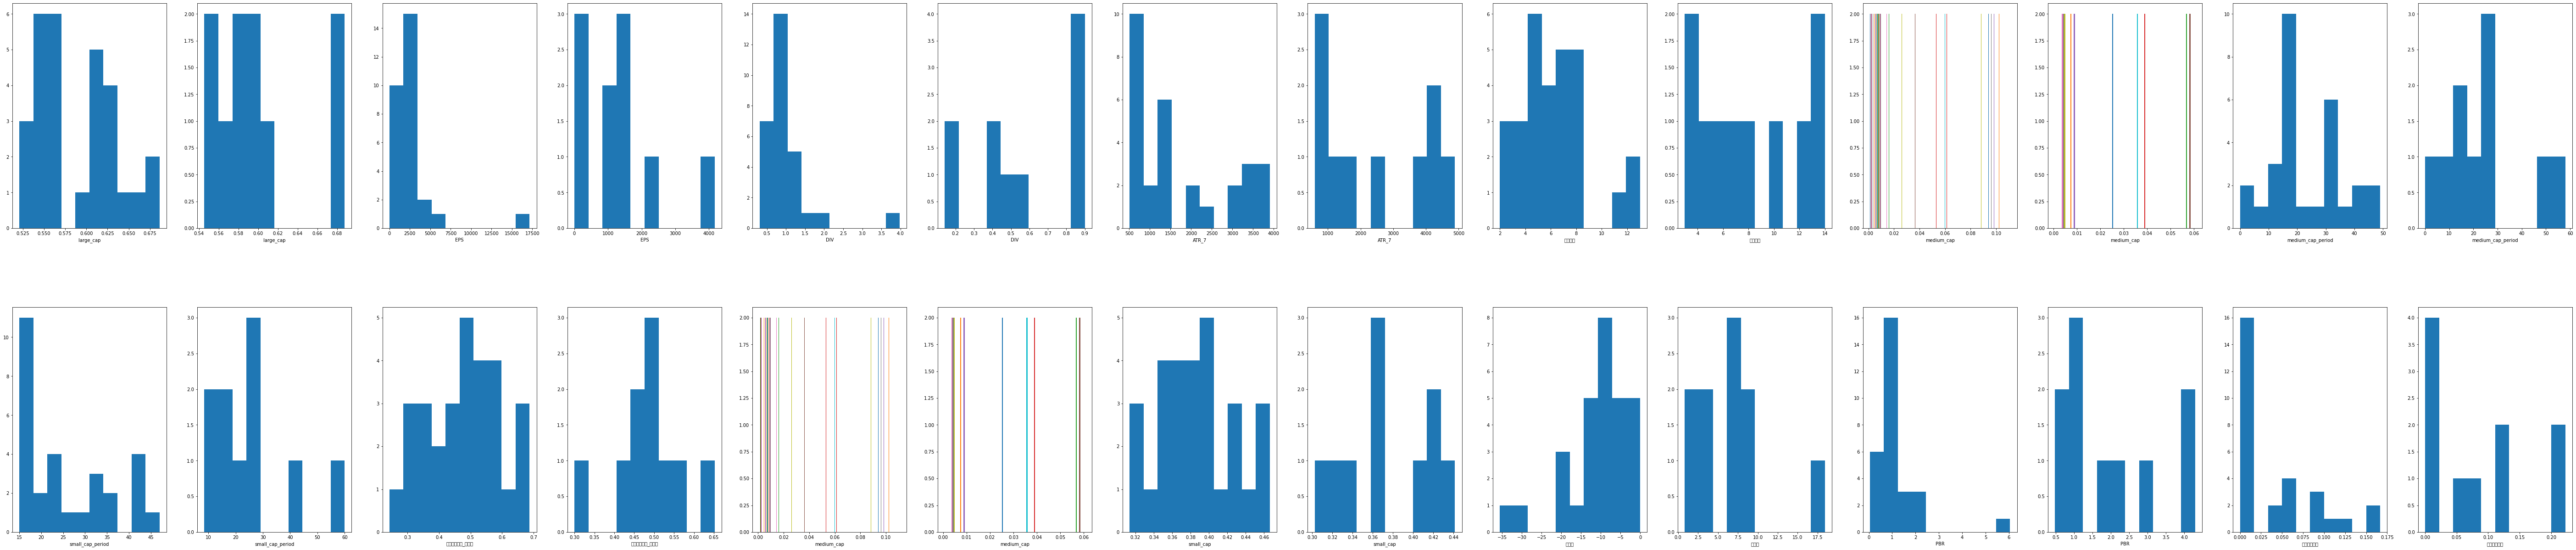

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'AAAA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'AAAB'].loc[:, cluster_col]
# temp_cluster_2 = customer_info[customer_info_kmeans.Cluster == 2] 
col_list = list(temp_cluster_0)
# for i in range(0,4,4):
# print(i)
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_0[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1
    

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

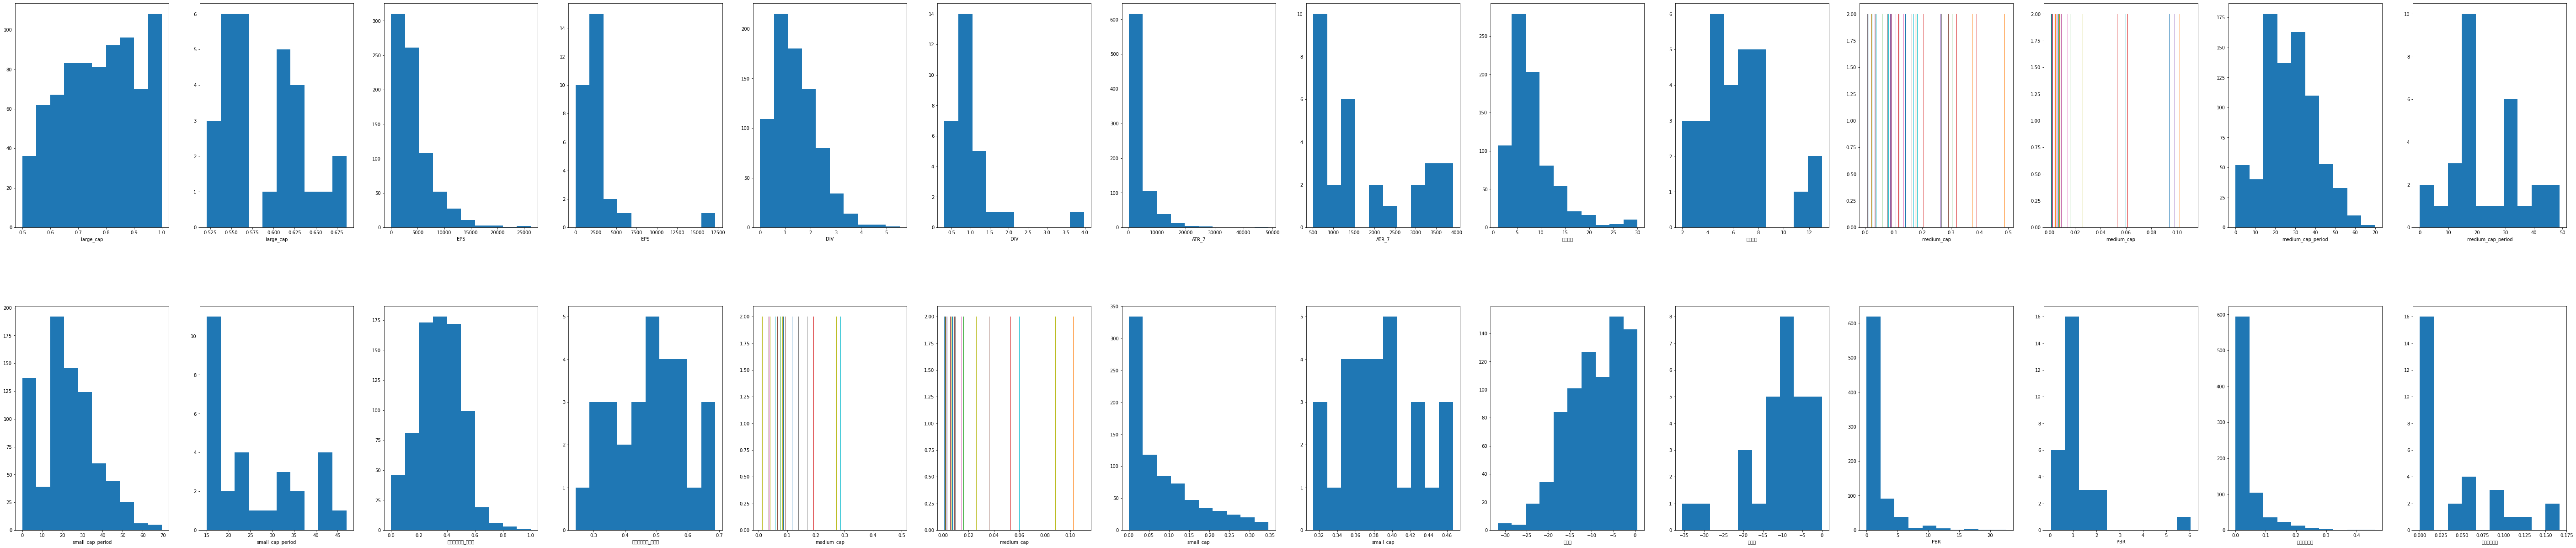

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'AABA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'AAAA'].loc[:, cluster_col]
# temp_cluster_2 = customer_info[customer_info_kmeans.Cluster == 2] 
col_list = list(temp_cluster_0)
# for i in range(0,4,4):
# print(i)
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_0[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1
    

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

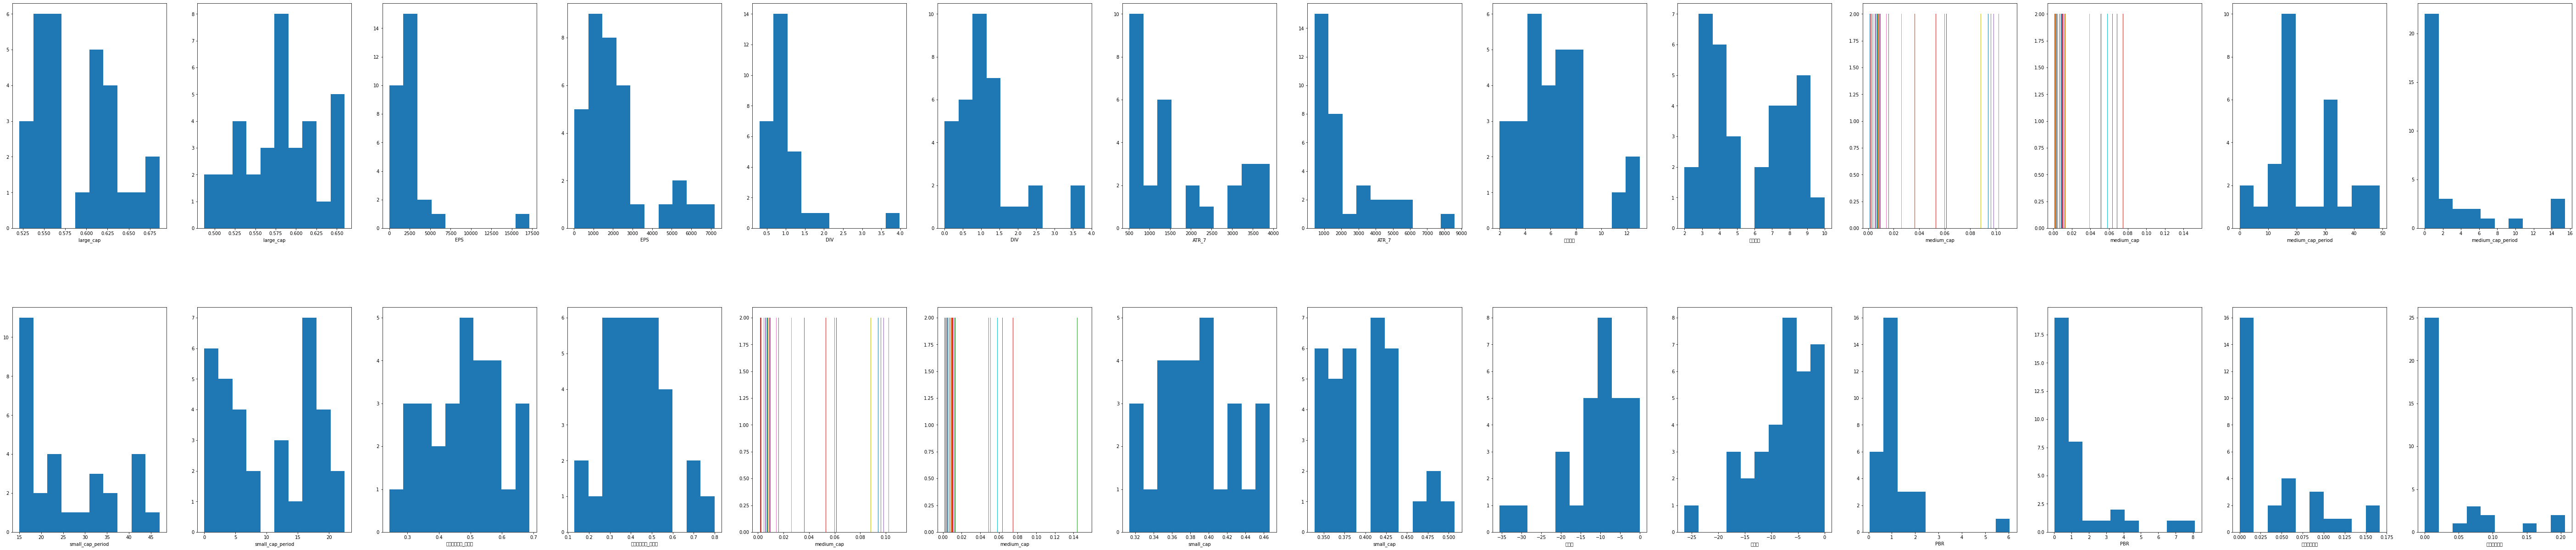

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'AAAA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'ABAA'].loc[:, cluster_col]
# temp_cluster_2 = customer_info[customer_info_kmeans.Cluster == 2] 
col_list = list(temp_cluster_0)
# for i in range(0,4,4):
# print(i)
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_0[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1
    

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

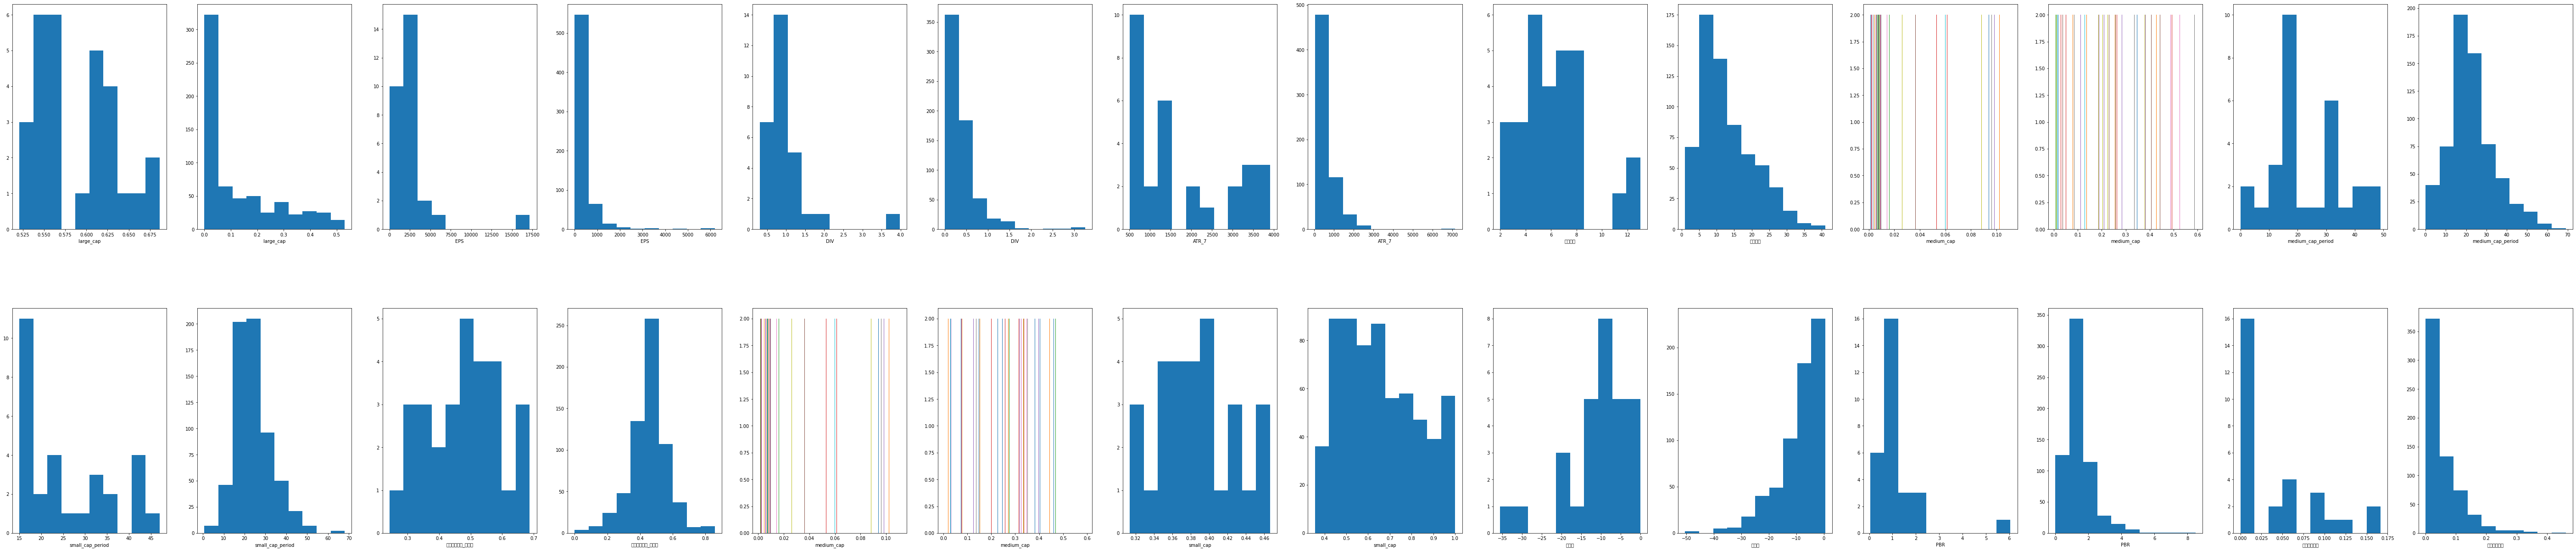

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'AAAA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'BAAA'].loc[:, cluster_col]
# temp_cluster_2 = customer_info[customer_info_kmeans.Cluster == 2] 
col_list = list(temp_cluster_0)
# for i in range(0,4,4):
# print(i)
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_0[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1
    

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

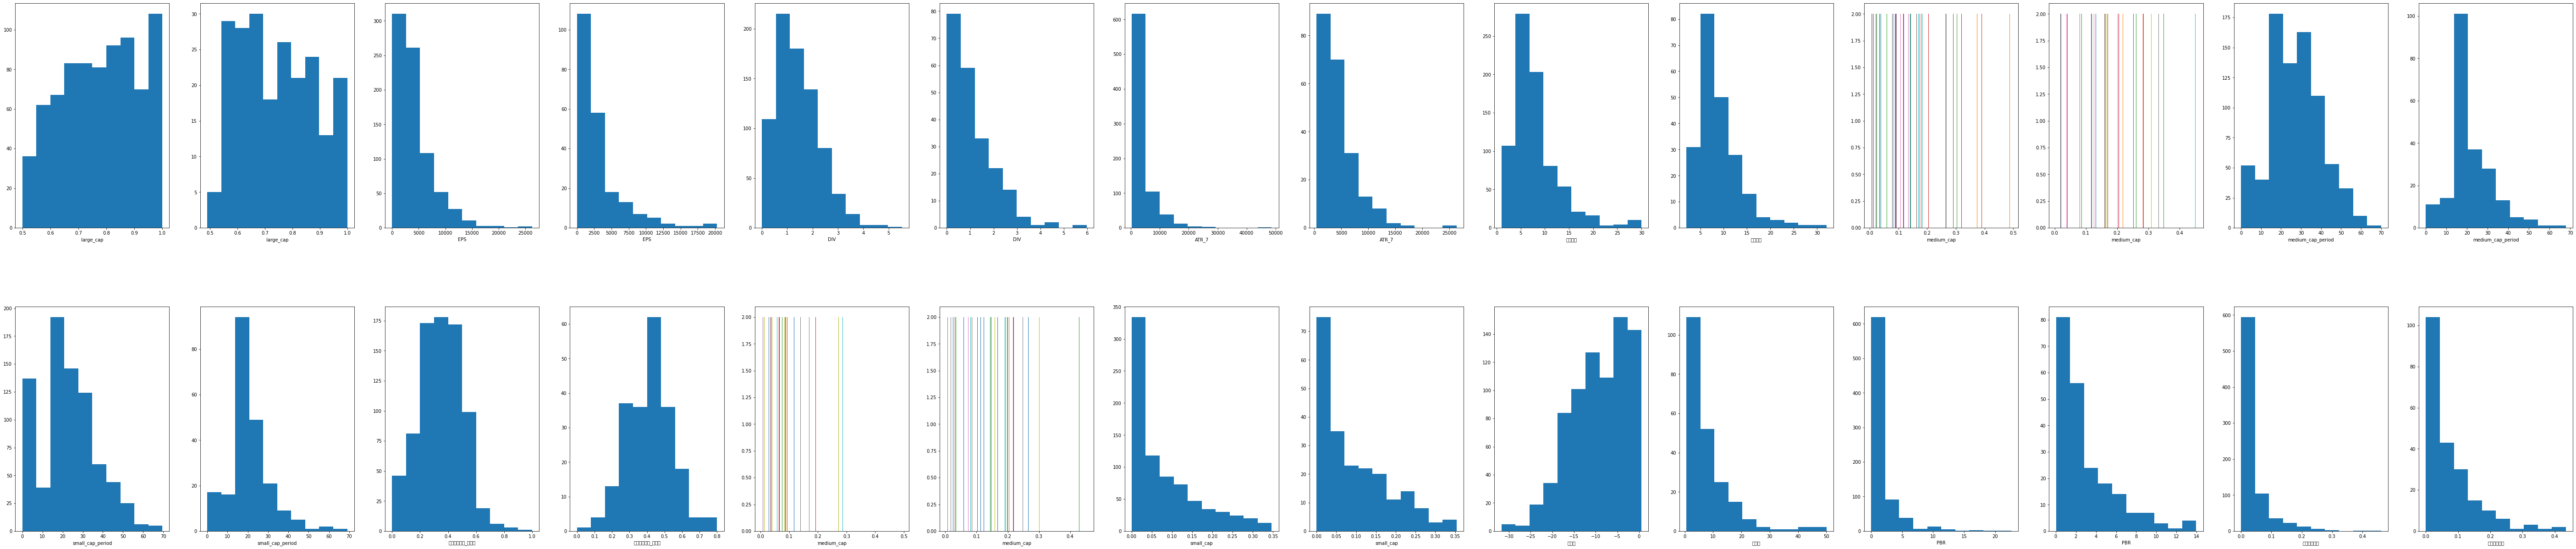

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'AABA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'AABB'].loc[:, cluster_col]
# temp_cluster_2 = customer_info[customer_info_kmeans.Cluster == 2] 
col_list = list(temp_cluster_0)
# for i in range(0,4,4):
# print(i)
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_0[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1
    

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

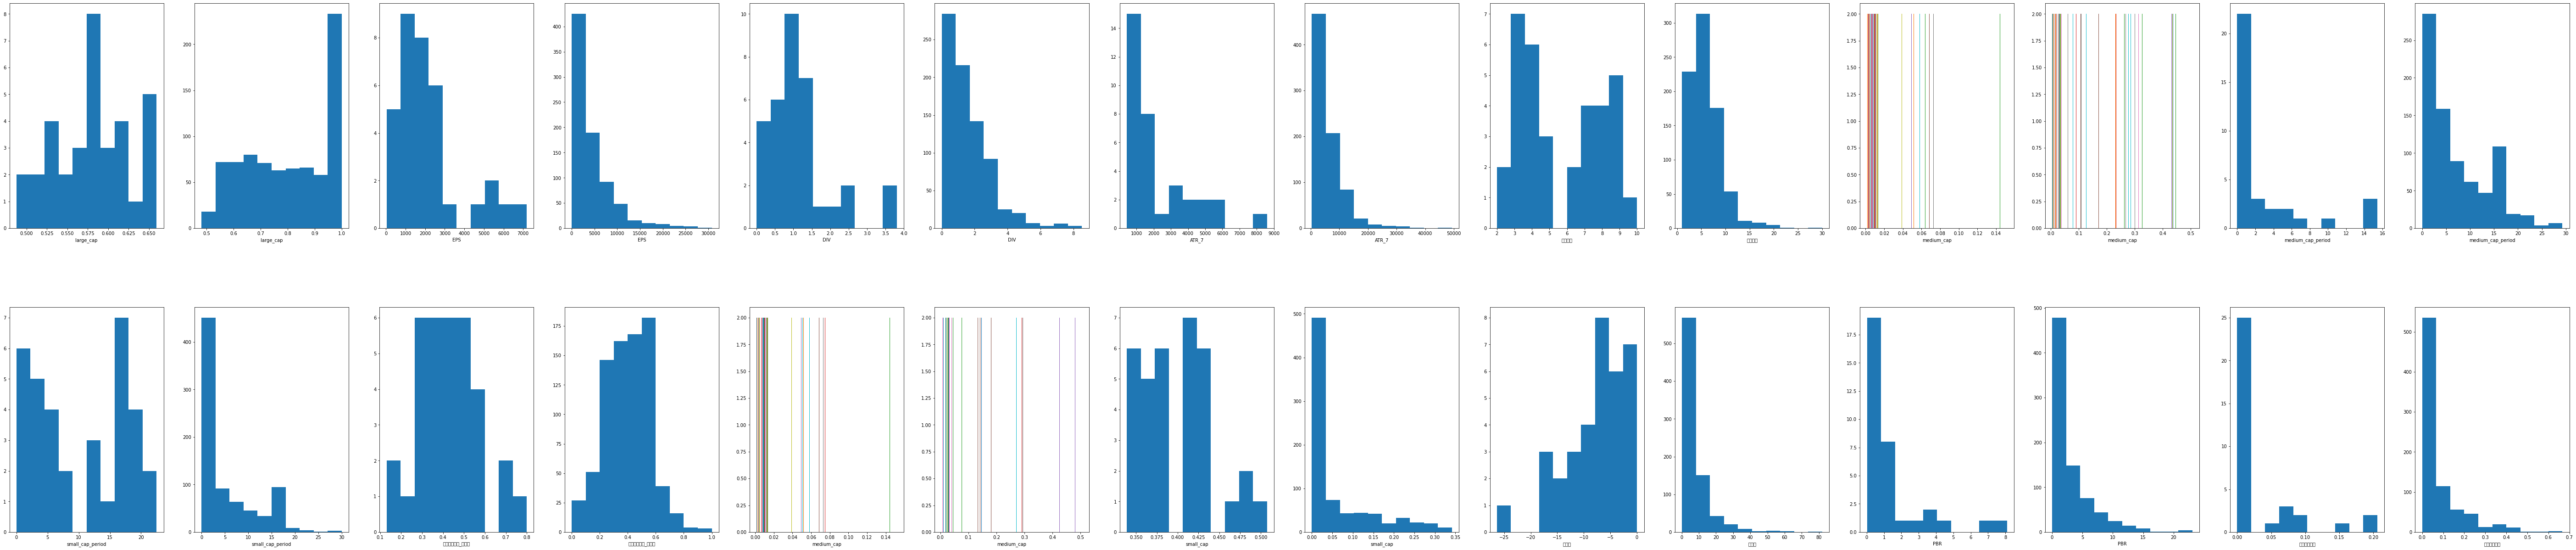

In [ ]:
temp_cluster_0 = customer_info[customer_info.MBTI == 'ABAA'].loc[:, cluster_col]
temp_cluster_1 = customer_info[customer_info.MBTI == 'ABBB'].loc[:, cluster_col]
# temp_cluster_2 = customer_info[customer_info_kmeans.Cluster == 2] 
col_list = list(temp_cluster_0)
# for i in range(0,4,4):
# print(i)
j = 1
plt.figure(figsize= (100, 20))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)


for i in range(len(cluster_col)):
    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_0[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 2000)
    j += 1

    plt.subplot(2,len(cluster_col),j)
    plt.hist(temp_cluster_1[col_list[i]])
    plt.xlabel(col_list[i])
    # plt.ylim(0, 800)
    j += 1
    

plt.show()